In [10]:
try:
    with open('student_manual.train.txt') as f:
        f1 = open("out.txt", "w")
        fl1 = open("label_1.txt", "w")
        fl2 = open("label_2.txt", "w")
        fl3 = open("label_3.txt", "w")
        fl4 = open("label_4.txt", "w")
        fl5 = open("label_5.txt", "w")
        while True:
            line1 = f.readline().strip()
            line2 = f.readline().strip()[4:]
            if line1 and len(line1)>1 : 
                out = '__label__'+line2 +'	'+line1+'\n'
                if line2 =='1':
                    fl1.write(out)
                if line2 =='2':
                    fl2.write(out)
                if line2 =='3':
                    fl3.write(out)
                if line2 =='4':
                    fl4.write(out)
                if line2 =='5':
                    fl5.write(out)
                f1.write(out)                
#                 print(out)
            if not line1: 
                f1.close()
                f.close()
                fl1.close()
                fl2.close()
                fl3.close()
                fl4.close()
                fl5.close()
                break 
        
            
except StopIteration:
    print ("end")

In [34]:
fl1 = open("label_1.txt")
fl2 = open("label_2.txt")
fl3 = open("label_3.txt")
fl4 = open("label_4.txt")
fl5 = open("label_5.txt")
arr1=[]
arr2=[]
arr3=[]
arr4=[]
arr5=[]

while True:
    line1 = fl1.readline()
    if line1:
        arr1.append(line1)
    if not line1:
        fl1.close()
        break
while True:
    line1 = fl2.readline()
    if line1:
        arr2.append(line1)
    if not line1:
        fl2.close()
        break
while True:
    line1 = fl3.readline()
    if line1:
        arr3.append(line1)
    if not line1:
        fl3.close()
        break
while True:
    line1 = fl4.readline()
    if line1:
        arr4.append(line1)
    if not line1:
        fl4.close()
        break
while True:
    line1 = fl5.readline()
    if line1:
        arr5.append(line1)
    if not line1:
        fl5.close()
        break
        
train_arr = arr1[:int(len(arr1)*0.8)]
train_arr.extend(arr2[:int(len(arr2)*0.8)])
train_arr.extend(arr3[:int(len(arr3)*0.8)])
train_arr.extend(arr4[:int(len(arr4)*0.8)])
train_arr.extend(arr5[:int(len(arr5)*0.8)])

# dev_arr = arr1[:int(len(arr1)*0.1)]
# dev_arr.extend(arr2[:int(len(arr2)*0.1)])
# dev_arr.extend(arr3[:int(len(arr3)*0.1)])
# dev_arr.extend(arr4[:int(len(arr4)*0.1)])
# dev_arr.extend(arr5[:int(len(arr5)*0.1)])

test_arr = arr1[:int(len(arr1)*0.2)]
test_arr.extend(arr2[:int(len(arr2)*0.2)])
test_arr.extend(arr3[:int(len(arr3)*0.2)])
test_arr.extend(arr4[:int(len(arr4)*0.2)])
test_arr.extend(arr5[:int(len(arr5)*0.2)])

f1 = open("train.txt", "w")
# f2 = open("dev.txt", "w")
f3 = open("test.txt", "w")
for item in train_arr :
    f1.write(item)
# for item in dev_arr :
#     f2.write(item)
for item in test_arr :
    f3.write(item)
    


Text(0, 0.5, 'Label')

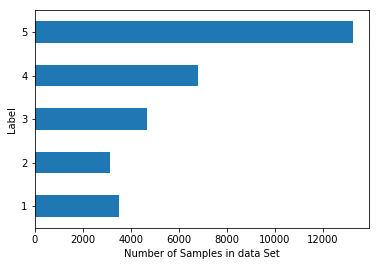

In [41]:
import pandas as pd
# Read train data
df = pd.read_csv('out.txt', sep='\t', header=None, names=['truth', 'text'])
df['truth'] = df['truth'].str.replace('__label__', '')
df['truth'] = df['truth'].astype(int).astype('category')
# df.head()
import matplotlib.pyplot as plt
ax = df['truth'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in data Set")
ax.set_ylabel("Label")